Percentage of each class:
0    65.367965
1    34.632035
Name: chd, dtype: float64
---------------------------------------
Number of missing values:
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
---------------------------------------
Number of categorical variables:
1
--------------------------------------
Correlation matrix:


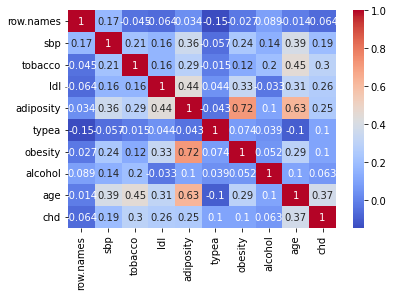

---------------------------------------


Text(0.5, 1.0, 'Mini Batch Change in Cost: 10000 Epochs, alpha = 0.0001')

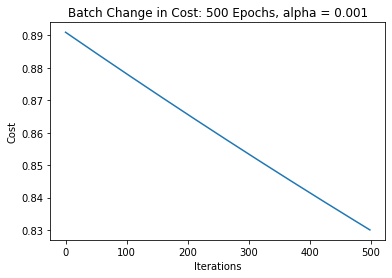

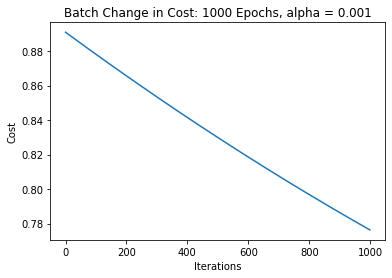

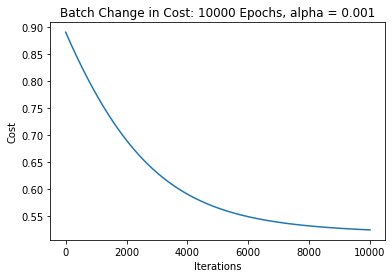

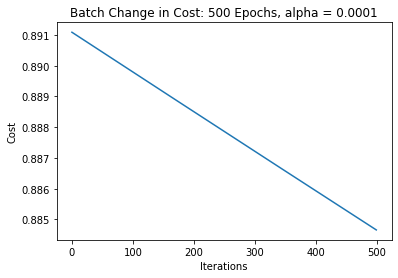

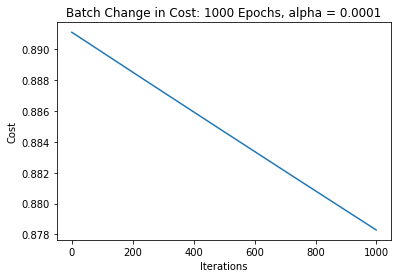

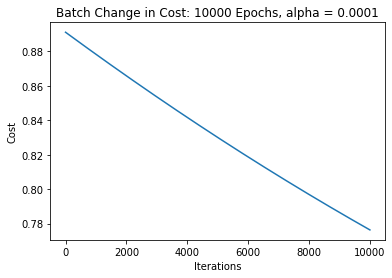

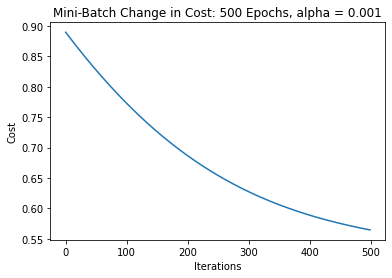

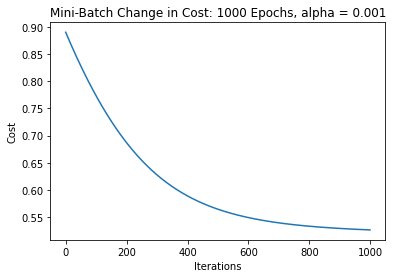

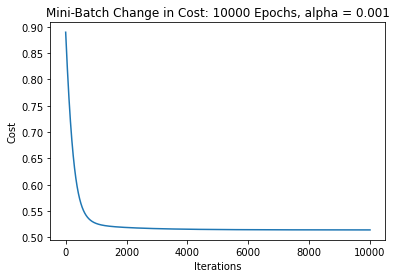

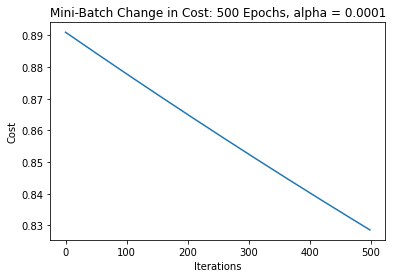

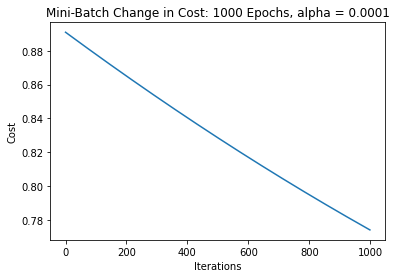

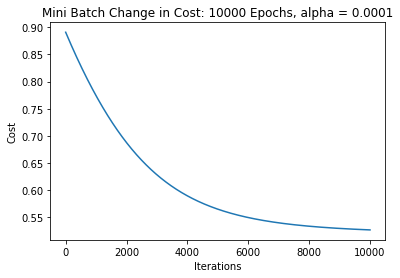

In [36]:
# Hansel Kalathil
# Student Number: 500768880

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from math import e
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df = pd.read_csv(url)

# Normalize the data
normal_std = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
scaler = StandardScaler()
df[normal_std] = scaler.fit_transform(df[normal_std])

data = df.to_numpy()

class_0 = 0
class_1 = 0
missing = 0

# Convert to Values
for row in data:
  if row[5] == 'Absent':
    row[5] = 0
  if row[5] == 'Present':
    row[5] = 1
for row in data:
  if row[10] == 1:
    class_1 = class_1 + 1 
  if row[10] == 0:
    class_0 = class_0 + 1
for row in data:
  for i in range(len(row)):
    if pd.isna(row[i]) or row[i] == '':
      missing += 1
  row[0] = 1


# EDA
print("Percentage of each class:")
print(df['chd'].value_counts(normalize=True)*100)
print("---------------------------------------")

print("Number of missing values:")
print(df.isnull().sum())
print("---------------------------------------")

print("Number of categorical variables:")
print(df.select_dtypes(include=['object']).shape[1])
print("--------------------------------------")

print("Correlation matrix:")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
print("---------------------------------------")

# Theta Initialization
theta = [random.uniform(0, 1) for i in range(10)]
theta = np.array(theta)
theta_list = [theta.copy() for _ in range(12)]
theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7, theta_8, theta_9, theta_10, theta_11, theta_12 = theta_list


def hypothesis(theta):
    store = []
    for row in data:
        new_theta = theta.T
        z = np.dot(new_theta, row[:-1])
        sigmoid_new = 1 / (1 + np.exp(-z))
        store.append(sigmoid_new)
    hypot = np.array(store)
    return hypot

def cost(theta):
    J = 0
    sigmoid = hypothesis(theta)
    for i in range(len(data)):
        J1 = data[i][10]*np.log(sigmoid[i])
        J2 = (1-data[i][10])*np.log(1-sigmoid[i])
        J = J + J1 + J2
    J_final = -(J)/len(data)
    return J_final

# Batch
def gradient_descent(theta, learning_rate, epochs, batch_size=None):
    if batch_size is None:
        batch_size = len(data)
    
    costs = []
    for epoch in range(epochs):
        pos = 0
        sigmoid = hypothesis(theta)
        
        while pos + batch_size <= len(data):
            gradients = [0] * len(data[0])
            for j in range(pos, pos + batch_size):
                error = sigmoid[j] - data[j][-1]
                for i in range(len(data[0])-1):
                    gradients[i] += error * data[j][i]
            
            for i in range(len(data[0])-1):
                theta[i] -= learning_rate * (gradients[i] / batch_size)
            
            pos += batch_size
        
        costs.append(cost(theta))
            
    return costs

# Mini Batch
def mini_gradient_descent(theta, learning_rate, epochs, batch_size=None):
    if batch_size is None:
        batch_size = len(data)
    
    costs = []
    for epoch in range(epochs):
        pos = 0
        sigmoid = hypothesis(theta)
        
        while pos + batch_size <= len(data):
            gradients = [0] * len(data[0])
            for j in range(pos, pos + batch_size):
                error = sigmoid[j] - data[j][-1]
                for i in range(len(data[0])-1):
                    gradients[i] += error * data[j][i]
            
            for i in range(len(data[0])-1):
                theta[i] -= learning_rate * (gradients[i] / batch_size)
            
            pos += batch_size
        
        if pos < len(data):
            gradients = [0] * len(data[0])
            for j in range(pos, len(data)):
                error = sigmoid[j] - data[j][-1]
                for i in range(len(data[0])-1):
                    gradients[i] += error * data[j][i]
            
            for i in range(len(data[0])-1):
                theta[i] -= learning_rate * (gradients[i] / (len(data) - pos))
        
        costs.append(cost(theta))
            
    return costs

# Batch plot
costs = gradient_descent(theta_1, 0.001, 500)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 500 Epochs, alpha = 0.001')

costs = gradient_descent(theta_2, 0.001, 1000)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 1000 Epochs, alpha = 0.001')

costs = gradient_descent(theta_3, 0.001, 10000)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 10000 Epochs, alpha = 0.001')

costs = gradient_descent(theta_4, 0.0001, 500)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 500 Epochs, alpha = 0.0001')

costs = gradient_descent(theta_5, 0.0001, 1000)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 1000 Epochs, alpha = 0.0001')

costs = gradient_descent(theta_6, 0.0001, 10000)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Batch Change in Cost: 10000 Epochs, alpha = 0.0001')

# Mini Batch Plot
costs = mini_gradient_descent(theta_7, 0.001, 500, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini-Batch Change in Cost: 500 Epochs, alpha = 0.001')

costs = mini_gradient_descent(theta_8, 0.001, 1000, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini-Batch Change in Cost: 1000 Epochs, alpha = 0.001')

costs = mini_gradient_descent(theta_9, 0.001, 10000, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini-Batch Change in Cost: 10000 Epochs, alpha = 0.001')

costs = mini_gradient_descent(theta_10, 0.0001, 500, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini-Batch Change in Cost: 500 Epochs, alpha = 0.0001')

costs = mini_gradient_descent(theta_11, 0.0001, 1000, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini-Batch Change in Cost: 1000 Epochs, alpha = 0.0001')

costs = mini_gradient_descent(theta_12, 0.0001, 10000, 50)
plt.figure()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Mini Batch Change in Cost: 10000 Epochs, alpha = 0.0001')

Batch Gradient Descent Iteration: 
we can see from the graphs, when alpha is 0.001 the system requires over 8000 epochs to start slowing down (getting closer to best value)
when alpha is 0.0001 the system does not slow down and takes a long time to correct itself and does not slow down

Mini-Batch Gradient Descent Iteration:
when alpha is 0.001 we can clearly see that after 1000 epochs the error does not change as much and after 5000 epochs there seems to be no significant change in cost
when alpha is 0.0001 the system slightly slows down after 3000 epochs but still significantly changes in error all the way up to 10000 epochs so we cannot say when would be a good epoch to stop training